In [10]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [3]:
data = pd.read_csv('./data/panel_data_04_05.csv')

In [4]:
data = data[data['scraping_date'] == '26-04-2021']

In [5]:
data.head(3)

,name,languages,description,rating,nb_reviews,Price/hour in USD,skills,industry_expertise,nb_projects,nb_buyers,last_active,gender,city,country,score,scraping_date
0,Maria H.,['English'],We are a small UK based company speciaIising i...,4.9,4694,34.74,"['animation', 'graphics design', 'brand design...","['IT', 'Internet', 'Marketing', 'Media', 'Tech...",7672,4168,26-04-2021,female,Sheffield,United Kingdom,10.043,26-04-2021
2,Jessica O'Neill,['English'],Your blog content and website copy need to be ...,5.0,1215,76.42,"['editing', 'proofreading', 'transcription', '...","['PR', 'Sales', 'Travel']",1541,878,26-04-2021,female,City of London,United Kingdom,8.712,26-04-2021
4,Scott Anfield,['English'],An experienced and professional writer based i...,4.9,1719,20.84,"['article', 'product description', 'content wr...","['Advertising', 'Education', 'Marketing', 'Sal...",1750,1071,25-04-2021,male,Doncaster,United Kingdom,9.039,26-04-2021


number of countries : 155


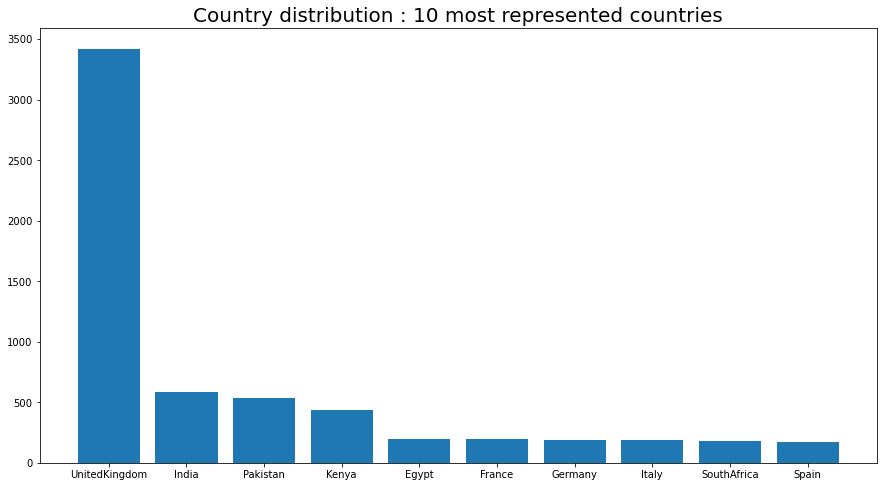

In [6]:
location = data['country']

country = [ l.split(',')[-1].replace(" ", "") for l in location ]
count = Counter(country).most_common(10)

print('number of countries :', len(Counter(country)))

figure = plt.figure(figsize=(15,8))
keys = [count[i][0] for i in range(len(count))]
values = [count[i][1] for i in range(len(count))]
plt.bar(keys, values)
plt.title("Country distribution : 10 most represented countries", fontsize = 20)
plt.show()

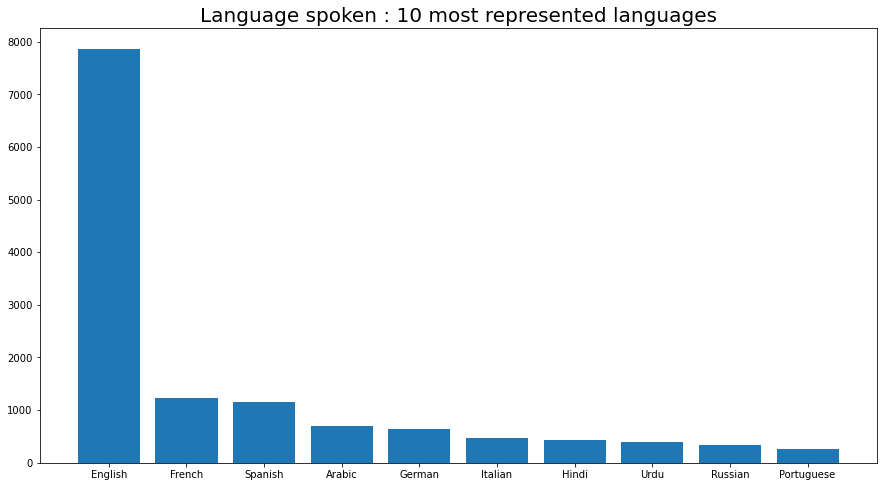

In [11]:
speaking = data['languages']
language = []

for s in speaking :
    zeub = str(s).replace("speaking", "").replace("and", "").replace("nan", "").replace("'","")
    zanzi = re.findall(r"[\w']+", zeub)
    for l in zanzi :
        language.append(l)
    
count = Counter(language).most_common(10)

figure = plt.figure(figsize=(15,8))
keys = [count[i][0] for i in range(len(count))]
values = [count[i][1] for i in range(len(count))]
plt.bar(keys, values)
plt.title("Language spoken : 10 most represented languages", fontsize = 20)
plt.show()

<Figure size 1080x576 with 0 Axes>

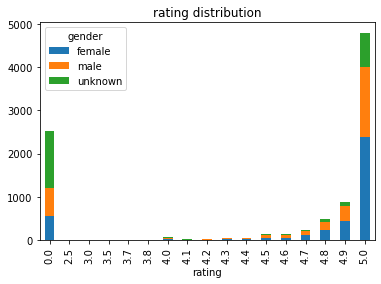

Number of workers with null rating : 2535
Number of workers with inactive profiles (no projects and null rating) : 2447
mean of female ratings :  4.21
mean of male ratings :  3.9
mean of undefined ratings :  2.2


In [14]:
figure = plt.figure(figsize=(15,8))

plt_rating_gender = data.groupby(['gender', 'rating'])['rating'].count().unstack('gender').fillna(0)
plt_rating_gender.plot(kind='bar', stacked=True, title = "rating distribution")

plt.show()

print('Number of workers with null rating :', len(data.loc[(data['rating'] == 0)]))
print('Number of workers with inactive profiles (no projects and null rating) :',  len(data.loc[(data['rating'] == 0) & (data['nb_projects'] == 0)]))
print('mean of female ratings : ', round(data[data['gender'] == 'female']['rating'].mean(),2))
print('mean of male ratings : ', round(data[data['gender'] == 'male']['rating'].mean(),2))
print('mean of undefined ratings : ', round(data[data['gender'] == 'unknown']['rating'].mean(),2))

All the workers have good grades. Only a minority of them has a rating lower than 4.9 as the null rating are only inactive profiles

Text(0.5, 1.0, 'score distribution')

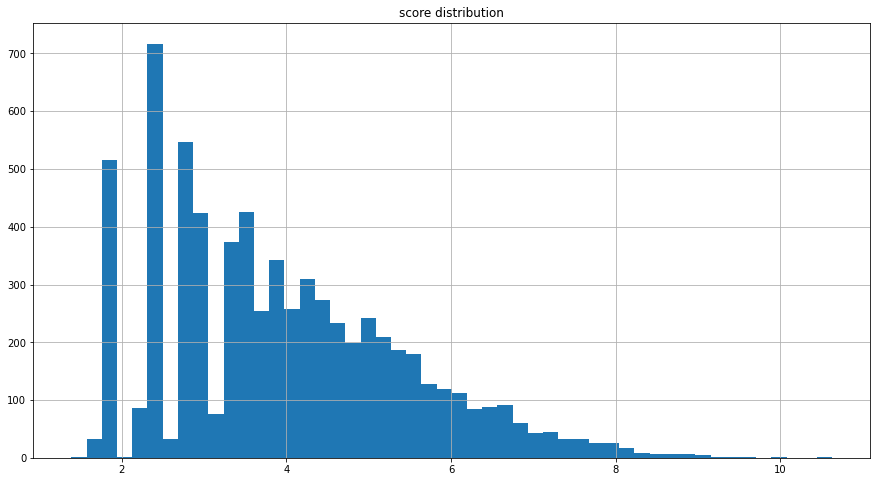

In [19]:
figure = plt.figure(figsize=(15,8))

data[data['score'] != 0]['score'].hist(bins = 50)
plt.title("score distribution")

Proportion of active profiles with more than 1000 reviews :  0.41000000000000003 %


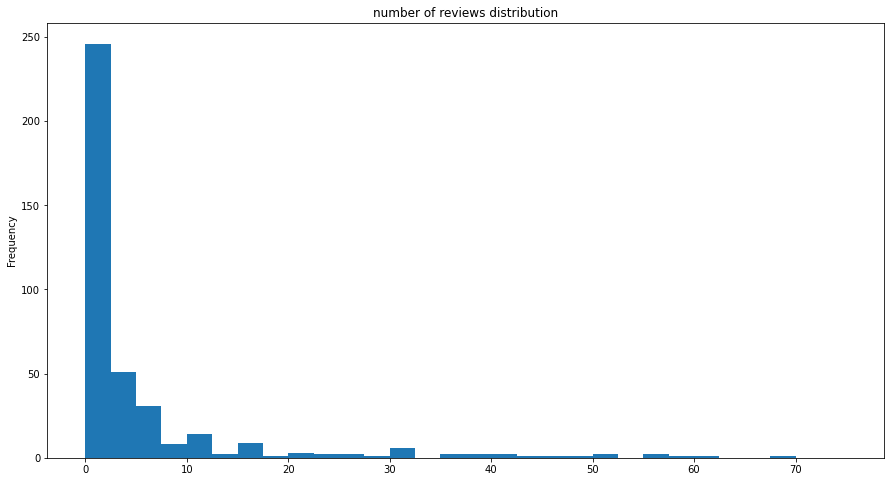

In [20]:
figure = plt.figure(figsize=(15,8))

plt_reviews = data.loc[(0<data['nb_reviews'])].groupby('nb_reviews')['nb_reviews'].count()
plt_reviews.plot(kind='hist', range = [0,75], bins = 30, title = "number of reviews distribution")

print("Proportion of active profiles with more than 1000 reviews : ", 100 * 
      round(len(data.loc[(0<data['nb_reviews']) & (data['nb_reviews']>1000)]['nb_reviews'])/
            len(data.loc[(0<data['nb_reviews'])]['nb_reviews']),4), "%")


Of all the active profiles, we can see that the mast majority has only few feedbacks. There are several profiles with a lot of reviews

<AxesSubplot:>

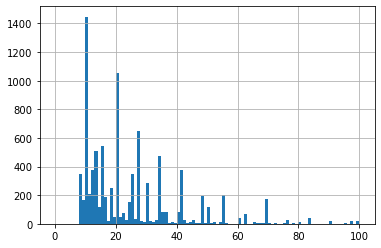

In [86]:
data['Price/hour in USD'].hist(bins = 100, range = [0,100])

mean of female salary :  30.38 $
mean of male salary :  29.6 $
mean of undefined salary :  21.05 $


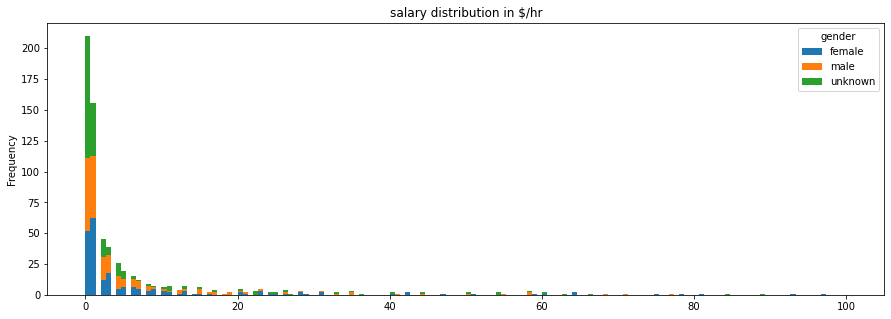

In [87]:
plt_salary_gender = data.groupby(['gender', 'Price/hour in USD'])['Price/hour in USD'].count().unstack('gender').fillna(0)
plt_salary_gender.plot(kind='hist', bins = 150, range = [0,100], stacked = True, figsize=(15,5), title = "salary distribution in $/hr")


print('mean of female salary : ', round(data[data['gender'] == 'female']['Price/hour in USD'].mean(),2), '$')
print('mean of male salary : ', round(data[data['gender'] == 'male']['Price/hour in USD'].mean(),2), '$')
print('mean of undefined salary : ', round(data[data['gender'] == 'unknown']['Price/hour in USD'].mean(),2), '$')

plt.show()

(-11.04441979895007,
 11.002115228521433,
 -11.063840291577913,
 11.232490265106021)

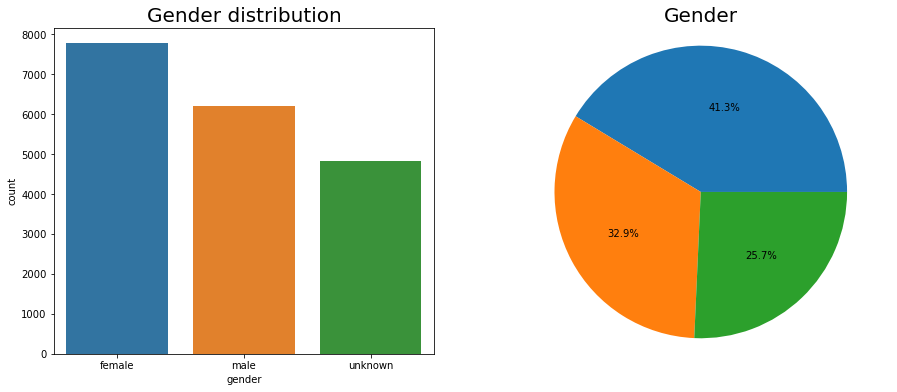

In [29]:
figure = plt.figure(figsize=(15,6))

axes = figure.add_subplot(121)
sns.countplot(x='gender', data=data)
plt.title("Gender distribution", color="black", fontsize = 20)


axes = figure.add_subplot(122)
axes.pie(data["gender"].value_counts(),radius = 10, autopct='%1.1f%%', textprops=dict(color="black"))
plt.title("Gender", color="black", fontsize = 20)
axes.axis('equal')

In [30]:
skills_list = []
for d in data['skills']:
    norm = d.replace("[", "").replace("]", "").replace("'", "").split(',')
    for s in norm :
        skills_list.append(s[1:])
        
print('There are', len(Counter(skills_list)), 'different skills listed by the workers \n')
print('The most common are : \n', Counter(skills_list).most_common(10))

There are 2825 different skills listed by the workers 

The most common are : 
 [('content writing', 7208), ('blog writing', 5636), ('copywriting', 4560), ('creative writing', 3889), ('proofreading', 3428), ('research writing', 2683), ('search engine optimization', 2532), ('roofreading', 2431), ('diting', 2413), ('web writing', 2187)]


In [34]:
expert_list = []
for d in data['industry_expertise']:
    norm = d.replace("Industry expertise:", "").split(',')
    for e in norm :
        expert_list.append(e[1:])
    
print('There are', len(Counter(expert_list)), 'different expertises listed by the workers \n')
print('The most common are : \n', Counter(expert_list).most_common(10))

There are 125 different expertises listed by the workers 

The most common are : 
 [(']', 6090), ("'Marketing'", 3413), ("'Education'", 2979), ("'Advertising'", 2551), ("'IT'", 1738), ("'Internet'", 1691), ("'Media'", 1688), ("'Travel']", 1642), ("'Entertainment'", 1579), ("'Technology']", 1500)]
